# Combined Cycle Power Plant Data Set 
URL : http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as sm

%matplotlib inline

In [2]:
data = pd.read_csv('data/Powerplant.csv')
data.head()

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net hourly electrical energy outpu
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
data.shape

(9568, 5)

In [4]:
data.describe()

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net hourly electrical energy outpu
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
data.count()

Ambient Temperature                   9568
Exhaust Vacuum                        9568
Ambient Pressure                      9568
Relative Humidity                     9568
Net hourly electrical energy outpu    9568
dtype: int64

# Exploratory Data Analysis

In [6]:
sns.set_style('darkgrid')
sns.despine()

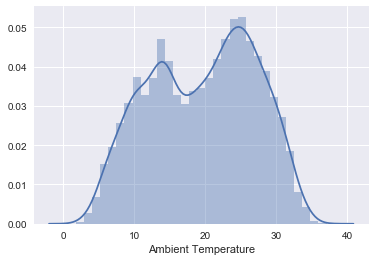

In [7]:
sns.distplot(data['Ambient Temperature'])

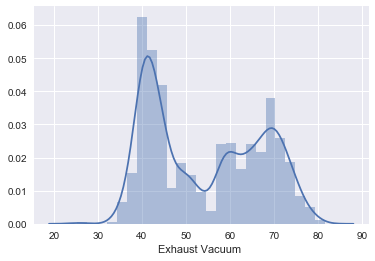

In [8]:
sns.distplot(data['Exhaust Vacuum '])

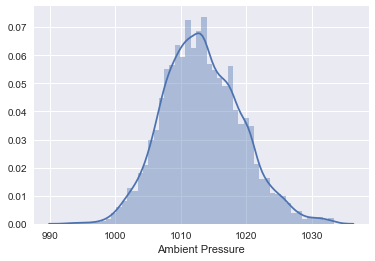

In [9]:
sns.distplot(data['Ambient Pressure'])

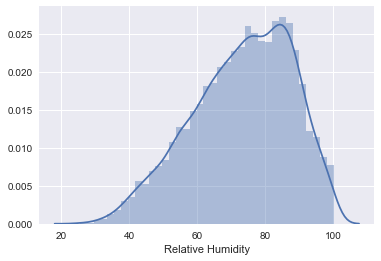

In [10]:
sns.distplot(data['Relative Humidity'])

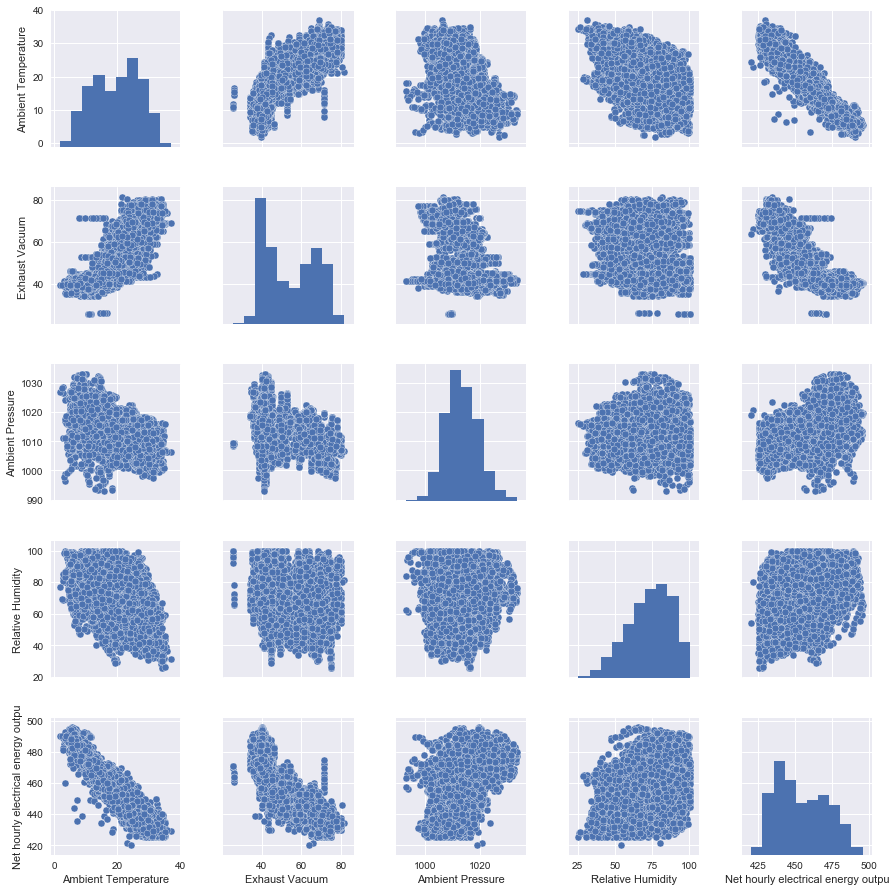

In [11]:
sns.pairplot(data)

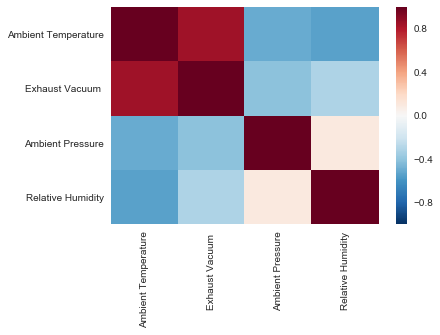

In [12]:
sns.heatmap(data.iloc[:,:-1].corr())

In [13]:
data = data.rename(columns={'Net hourly electrical energy outpu': 'output', 
                        'Exhaust Vacuum ': 'vaccum',
                       'Ambient Temperature':'temperature',
                       'Ambient Pressure':'pressure',
                       'Relative Humidity':'humidity'})

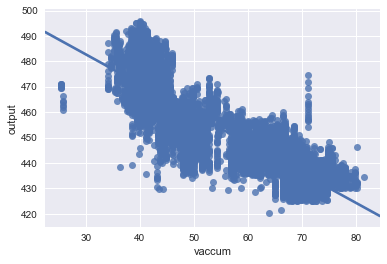

In [14]:
sns.regplot(x='vaccum', y='output', data=data)

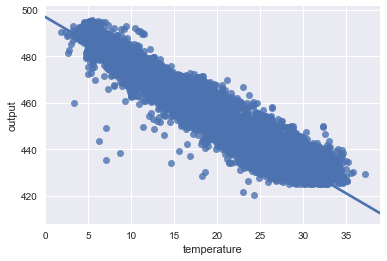

In [15]:
sns.regplot(x='temperature', y='output', data=data)

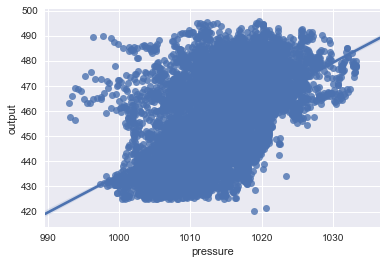

In [16]:
sns.regplot(x='pressure', y='output', data=data)

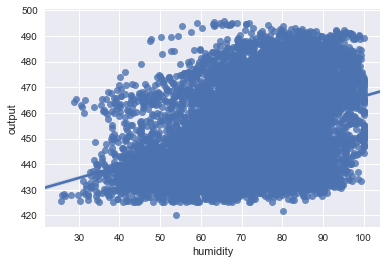

In [17]:
sns.regplot(x='humidity', y='output', data=data)

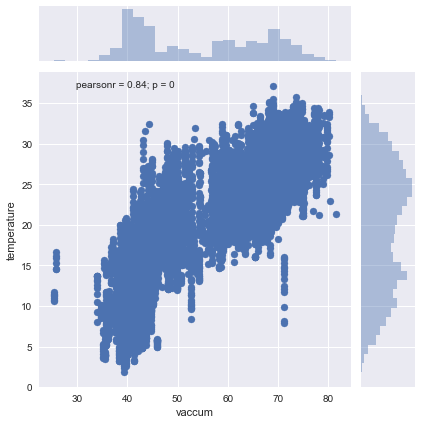

In [18]:
sns.jointplot(x='vaccum', y = 'temperature', data=data)

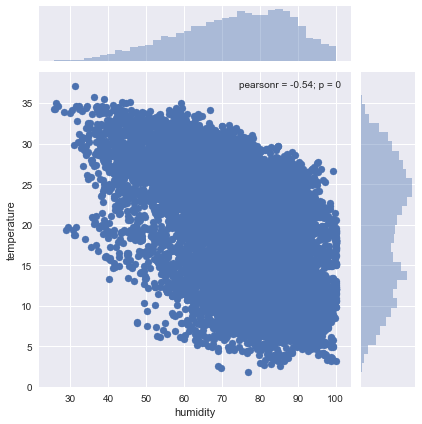

In [19]:
sns.jointplot(x='humidity', y = 'temperature', data=data)

# Building linear model

In [20]:
model_full = sm.ols(data=data, formula='output~temperature+vaccum+pressure+humidity').fit()

In [21]:
print model_full.summary()

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 03 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:53:39   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     454.6093      9.749     46.634      

# Model validation

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:3], data.iloc[:,-1], test_size=0.33, random_state=42)

In [23]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
model.coef_

array([-1.64832651, -0.32716987,  0.14321493])

## Training errors

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
predictions_train = model.predict(X_train)

In [26]:
print 'Mean absolute error: {0}'.format(mean_absolute_error(Y_train, predictions_train))
print 'Mean squared error: {0}'.format(mean_squared_error(Y_train, predictions_train))
print 'Median absolute error: {0}'.format(median_absolute_error(Y_train, predictions_train))
print 'R2 : {0}'.format(r2_score(Y_train,predictions_train))

Mean absolute error: 3.86272234761
Mean squared error: 23.7784401231
Median absolute error: 3.37138126984
R2 : 0.918287876883


## Testing errors

In [27]:
predictions = model.predict(X_test)

In [28]:
print 'Mean absolute error: {0}'.format(mean_absolute_error(Y_test, predictions))
print 'Mean squared error: {0}'.format(mean_squared_error(Y_test, predictions))
print 'Median absolute error: {0}'.format(median_absolute_error(Y_test, predictions))
print 'R2 : {0}'.format(r2_score(Y_test,predictions))

Mean absolute error: 3.89136046869
Mean squared error: 24.1393816957
Median absolute error: 3.37688582373
R2 : 0.917262266131
